# Student Alcohol Consumption

## Import Lib

In [39]:
!pip install ipywidgets

In [32]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=345012 sha256=debb652aec443270cf30965cf82d6e0773c6c205f4e40e5513f1d672ca328889
  Stored in directory: C:\Users\Admin\AppData\Local\Temp\pip-ephem-wheel-cache-uun_0m3f\wheels\07\29\61\f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=f7fe10646100d4981732b03954d0a94493461e7cf85fb14c315a7e664412b21b
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\dd\91\29\a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built ydata-profiling htmlmin


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from pandas_profiling import ProfileReport
sns.set()

In [2]:
!ls

EDA.ipynb
student-mat.csv


## Read Dataset

In [3]:
data = pd.read_csv("student-mat.csv")
data

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        6   5   6   6  
1    ...      5        3      3     1     1      3        4   5   5   6  
2    ...      4        3      2     2     3      3       10   7   8  10  
3    ...      3        2      2     1     1      5        2  15  14  15  
4    ...      4        3      2     1     2      5        4   6  10  10  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
390  ...      5        5      4     4     5      4       11   9   9   9  
391  ...      2        4      5     3     4      2        3  14  16  16  
392  ...      5        5      3     3     3      3        3  10   8   7  
393  ...      4        4      1     3     4      5        0  11  12  10  
394  ...      3        2      3     3     3      5        5   8   9   9  

[395 rows x 33 columns]

In [4]:
data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

## Ý nghĩa của các cột dữ liệu

- **school**: trường học
- **sex**: giới tính
- **age**: tuổi
- **address**: địa chỉ nhà (gồm 'U': urban và 'R': rural)
- **famsize**: số lượng thành viên trong gia đình ('LE3'- nhỏ hơn 3 và 'GT3'- lớn hơn 3)
- **Pstatus**: tình trạng sống với gia đình ('T' - sống cùng, 'A' - sống xa)
- **Medu**: trình độ học vấn của mẹ (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- **Fedu - father's education** (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- **Mjob - mother's job** (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **Fjob - father's job** (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **reason - reason to choose this school** (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- **guardian - student's guardian** (nominal: 'mother', 'father' or 'other')
- **traveltime - home to school travel time**: (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- **studytime - weekly study time**: (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- **failures - number of past class failures**: (numeric: n if 1<=n<3, else 4)
- **schoolsup - extra educational support**: (binary: yes or no)
- **famsup - family educational support**: (binary: yes or no)
- **paid - extra paid classes within the course subject**: (Math or Portuguese) (binary: yes or no)
- **activities - extra-curricular activities** (binary: yes or no)
- **nursery - attended nursery school**: (binary: yes or no)
- **higher - wants to take higher education**: (binary: yes or no)
- **internet - Internet access at home**: (binary: yes or no)
- **romantic - with a romantic relationship**: (binary: yes or no)
- **famrel - quality of family relationships**: (numeric: from 1 - very bad to 5 - excellent)
- **freetime - free time after school**: (numeric: from 1 - very low to 5 - very high)
- **goout - going out with friends**: (numeric: from 1 - very low to 5 - very high)
- **Dalc - workday alcohol consumption**: (numeric: from 1 - very low to 5 - very high)
- **Walc - weekend alcohol consumption**: (numeric: from 1 - very low to 5 - very high)
- **health - current health status**: (numeric: from 1 - very bad to 5 - very good)
- **absences - number of school absences**: (numeric: from 0 to 93)
- **G1 - first period grade**: (numeric: from 0 to 20)
- **G2 - second period grade**: (numeric: from 0 to 20)
- **G3 - final grade**: (numeric: from 0 to 20, output target)

## Kiểm tra thông tin dòng cột dữ liệu

In [5]:
# Kich thuoc du lieu
print("So dong: ", data.shape[0])
print("So cot: ", data.shape[1])

So dong:  395
So cot:  33


In [6]:
# Kiem tra kieu du lieu
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [7]:
data["number_day_alcohol"] = data["Dalc"] + data["Walc"]

In [8]:
# loc ra cac thuoc tinh numerical va categorical
numerical_data = [name for name in data.columns if data[name].dtype in ['int64']]
categorical_data = [name for name in data.columns if data[name].dtype in ['object']]

In [9]:
print("Number of categorical data: ", len(categorical_data))
print("Number of categorical data: ", len(numerical_data))

Number of categorical data:  17
Number of categorical data:  17


## Auto Profile Report

In [36]:
profile = ProfileReport(data, title="Student Alcohol Consumption")

In [40]:
profile.to_notebook_iframe()

Render HTML: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.13s/it]


## Thông kê mô tả

### Thống kê cho dữ liệu số

In [10]:
nume_df = data[numerical_data]

missing = nume_df.isna().sum()/len(nume_df)
mean_sr = nume_df.mean()
mode_sr = nume_df.apply(lambda x: x.mode()[0])
var_sr = nume_df.var()
std_sr = nume_df.std()


statistic = {"missing_percentage":missing,"mean": mean_sr, "mode": mode_sr, "variance": var_sr, "std": std_sr}

statistic_df = np.round(pd.DataFrame(statistic),4)


In [11]:
statistic_df

missing_percentage     mean  mode  variance     std
age                                0.0  16.6962    16    1.6283  1.2760
Medu                               0.0   2.7494     4    1.1984  1.0947
Fedu                               0.0   2.5215     2    1.1842  1.0882
traveltime                         0.0   1.4481     1    0.4865  0.6975
studytime                          0.0   2.0354     2    0.7043  0.8392
failures                           0.0   0.3342     0    0.5530  0.7437
famrel                             0.0   3.9443     4    0.8040  0.8967
freetime                           0.0   3.2354     3    0.9977  0.9989
goout                              0.0   3.1089     3    1.2394  1.1133
Dalc                               0.0   1.4810     1    0.7934  0.8907
Walc                               0.0   2.2911     1    1.6587  1.2879
health                             0.0   3.5544     5    1.9329  1.3903
absences                           0.0   5.7089     0   64.0495  8.0031
G1                                 0.0  10.9089    10   11.0171  3.3192
G2                                 0.0  10.7139     9   14.1489  3.7615
G3                                 0.0  10.4152    10   20.9896  4.5814
number_day_alcohol                 0.0   3.7722     2    3.9378  1.9844

### Thống kê cho dữ liệu Category

In [12]:
data[categorical_data].describe().T

count unique     top freq
school       395      2      GP  349
sex          395      2       F  208
address      395      2       U  307
famsize      395      2     GT3  281
Pstatus      395      2       T  354
Mjob         395      5   other  141
Fjob         395      5   other  217
reason       395      4  course  145
guardian     395      3  mother  273
schoolsup    395      2      no  344
famsup       395      2     yes  242
paid         395      2      no  214
activities   395      2     yes  201
nursery      395      2     yes  314
higher       395      2     yes  375
internet     395      2     yes  329
romantic     395      2      no  263

### Thống kê đối với từng nhóm mức độ sử dụng cồn

In [13]:
# Trung binh
nume_df.groupby(["number_day_alcohol"]).mean()

age      Medu      Fedu  traveltime  studytime  \
number_day_alcohol                                                         
2                   16.453333  2.813333  2.526667    1.380000   2.293333   
3                   16.772727  2.681818  2.484848    1.424242   2.000000   
4                   16.916667  2.766667  2.533333    1.350000   2.000000   
5                   16.644444  2.733333  2.711111    1.533333   1.911111   
6                   17.057143  2.371429  2.285714    1.571429   1.657143   
7                   16.823529  3.117647  2.470588    1.529412   1.470588   
8                   16.222222  3.111111  2.888889    1.666667   1.777778   
9                   18.000000  2.250000  2.250000    2.000000   2.000000   
10                  17.222222  2.777778  2.444444    1.888889   1.666667   

                    failures    famrel  freetime     goout      Dalc  \
number_day_alcohol                                                     
2                   0.253333  4.066667  3.160000  2.740000  1.000000   
3                   0.196970  4.015152  2.924242  2.848485  1.015152   
4                   0.333333  3.850000  3.266667  3.116667  1.300000   
5                   0.288889  3.711111  3.333333  3.311111  1.688889   
6                   0.800000  3.828571  3.400000  3.942857  2.171429   
7                   0.647059  3.941176  3.705882  3.764706  2.764706   
8                   0.333333  3.777778  3.444444  4.222222  3.333333   
9                   0.500000  4.500000  3.750000  3.750000  4.000000   
10                  0.444444  3.555556  4.111111  4.222222  5.000000   

                        Walc    health   absences         G1         G2  \
number_day_alcohol                                                        
2                   1.000000  3.433333   4.886667  11.206667  11.086667   
3                   1.984848  3.515152   4.818182  11.227273  10.651515   
4                   2.700000  3.516667   5.100000  11.100000  10.800000   
5                   3.311111  3.577778   7.755556  10.800000  10.844444   
6                   3.828571  3.914286   7.057143   9.714286   9.200000   
7                   4.235294  3.941176   7.000000  10.176471  10.411765   
8                   4.666667  3.444444   6.111111  10.000000  10.777778   
9                   5.000000  3.750000  12.500000   9.500000   9.250000   
10                  5.000000  3.888889   8.666667  10.444444  10.777778   

                           G3  
number_day_alcohol             
2                   10.806667  
3                   10.272727  
4                   10.366667  
5                   10.555556  
6                    9.000000  
7                   10.235294  
8                   10.444444  
9                    9.750000  
10                  10.666667

In [14]:
# Phuong sai
nume_df.groupby(["number_day_alcohol"]).var()

age      Medu      Fedu  traveltime  studytime  \
number_day_alcohol                                                        
2                   1.752841  1.132707  1.190559    0.344564   0.745593   
3                   1.316783  1.174126  1.207459    0.463403   0.707692   
4                   1.365819  1.131073  1.100565    0.299153   0.644068   
5                   1.188889  1.381818  1.164646    0.436364   0.446465   
6                   1.937815  1.710924  1.151261    0.781513   0.467227   
7                   1.279412  0.735294  1.639706    0.764706   0.514706   
8                   0.944444  0.611111  0.861111    1.250000   0.944444   
9                   2.000000  1.583333  1.583333    2.000000   0.000000   
10                  4.194444  1.194444  1.527778    1.611111   1.000000   

                    failures    famrel  freetime     goout      Dalc  \
number_day_alcohol                                                     
2                   0.445459  0.720358  1.034631  1.106443  0.000000   
3                   0.283683  0.876690  0.809557  0.899767  0.015152   
4                   0.463277  0.773729  1.114124  1.020056  0.213559   
5                   0.482828  0.710101  0.681818  0.991919  0.264646   
6                   1.282353  0.734454  1.070588  0.937815  0.440336   
7                   0.992647  0.933824  0.845588  1.691176  0.316176   
8                   0.250000  1.444444  1.527778  0.444444  0.250000   
9                   1.000000  0.333333  0.916667  1.583333  0.000000   
10                  1.027778  1.777778  0.611111  1.444444  0.000000   

                        Walc    health    absences         G1         G2  \
number_day_alcohol                                                         
2                   0.000000  1.871365   74.946801  12.178479  17.220626   
3                   0.015152  2.007459   34.827972  12.086014  15.707459   
4                   0.213559  2.016667   25.922034  10.735593  11.857627   
5                   0.264646  1.794949   95.370707   8.754545   7.816162   
6                   0.440336  2.198319  114.761345   9.621849  14.047059   
7                   0.316176  1.808824   61.625000  12.154412  13.382353   
8                   0.250000  3.027778   25.111111   4.250000   9.694444   
9                   0.000000  0.916667    1.666667   4.333333   3.583333   
10                  0.000000  1.611111   33.000000   6.777778   6.444444   

                           G3  
number_day_alcohol             
2                   25.754318  
3                   25.001399  
4                   18.507345  
5                   12.525253  
6                   15.529412  
7                   17.691176  
8                   22.777778  
9                    4.916667  
10                   7.250000

In [15]:
# Do lech chuan
nume_df.groupby(["number_day_alcohol"]).std()

age      Medu      Fedu  traveltime  studytime  \
number_day_alcohol                                                        
2                   1.323949  1.064287  1.091128    0.586996   0.863477   
3                   1.147512  1.083571  1.098844    0.680737   0.841244   
4                   1.168683  1.063519  1.049078    0.546948   0.802538   
5                   1.090362  1.175508  1.079188    0.660578   0.668180   
6                   1.392054  1.308023  1.072968    0.884032   0.683540   
7                   1.131111  0.857493  1.280510    0.874475   0.717430   
8                   0.971825  0.781736  0.927961    1.118034   0.971825   
9                   1.414214  1.258306  1.258306    1.414214   0.000000   
10                  2.048034  1.092906  1.236033    1.269296   1.000000   

                    failures    famrel  freetime     goout      Dalc  \
number_day_alcohol                                                     
2                   0.667427  0.848739  1.017168  1.051876  0.000000   
3                   0.532619  0.936317  0.899754  0.948560  0.123091   
4                   0.680644  0.879619  1.055521  1.009978  0.462125   
5                   0.694858  0.842675  0.825723  0.995951  0.514438   
6                   1.132410  0.857003  1.034692  0.968409  0.663578   
7                   0.996317  0.966345  0.919559  1.300452  0.562296   
8                   0.500000  1.201850  1.236033  0.666667  0.500000   
9                   1.000000  0.577350  0.957427  1.258306  0.000000   
10                  1.013794  1.333333  0.781736  1.201850  0.000000   

                        Walc    health   absences        G1        G2  \
number_day_alcohol                                                      
2                   0.000000  1.367978   8.657182  3.489768  4.149774   
3                   0.123091  1.416848   5.901523  3.476494  3.963264   
4                   0.462125  1.420094   5.091369  3.276522  3.443491   
5                   0.514438  1.339757   9.765793  2.958808  2.795740   
6                   0.663578  1.482673  10.712672  3.101910  3.747941   
7                   0.562296  1.344925   7.850159  3.486318  3.658190   
8                   0.500000  1.740051   5.011099  2.061553  3.113590   
9                   0.000000  0.957427   1.290994  2.081666  1.892969   
10                  0.000000  1.269296   5.744563  2.603417  2.538591   

                          G3  
number_day_alcohol            
2                   5.074871  
3                   5.000140  
4                   4.302016  
5                   3.539103  
6                   3.940737  
7                   4.206088  
8                   4.772607  
9                   2.217356  
10                  2.692582

## Trực quan dữ liệu Categorical

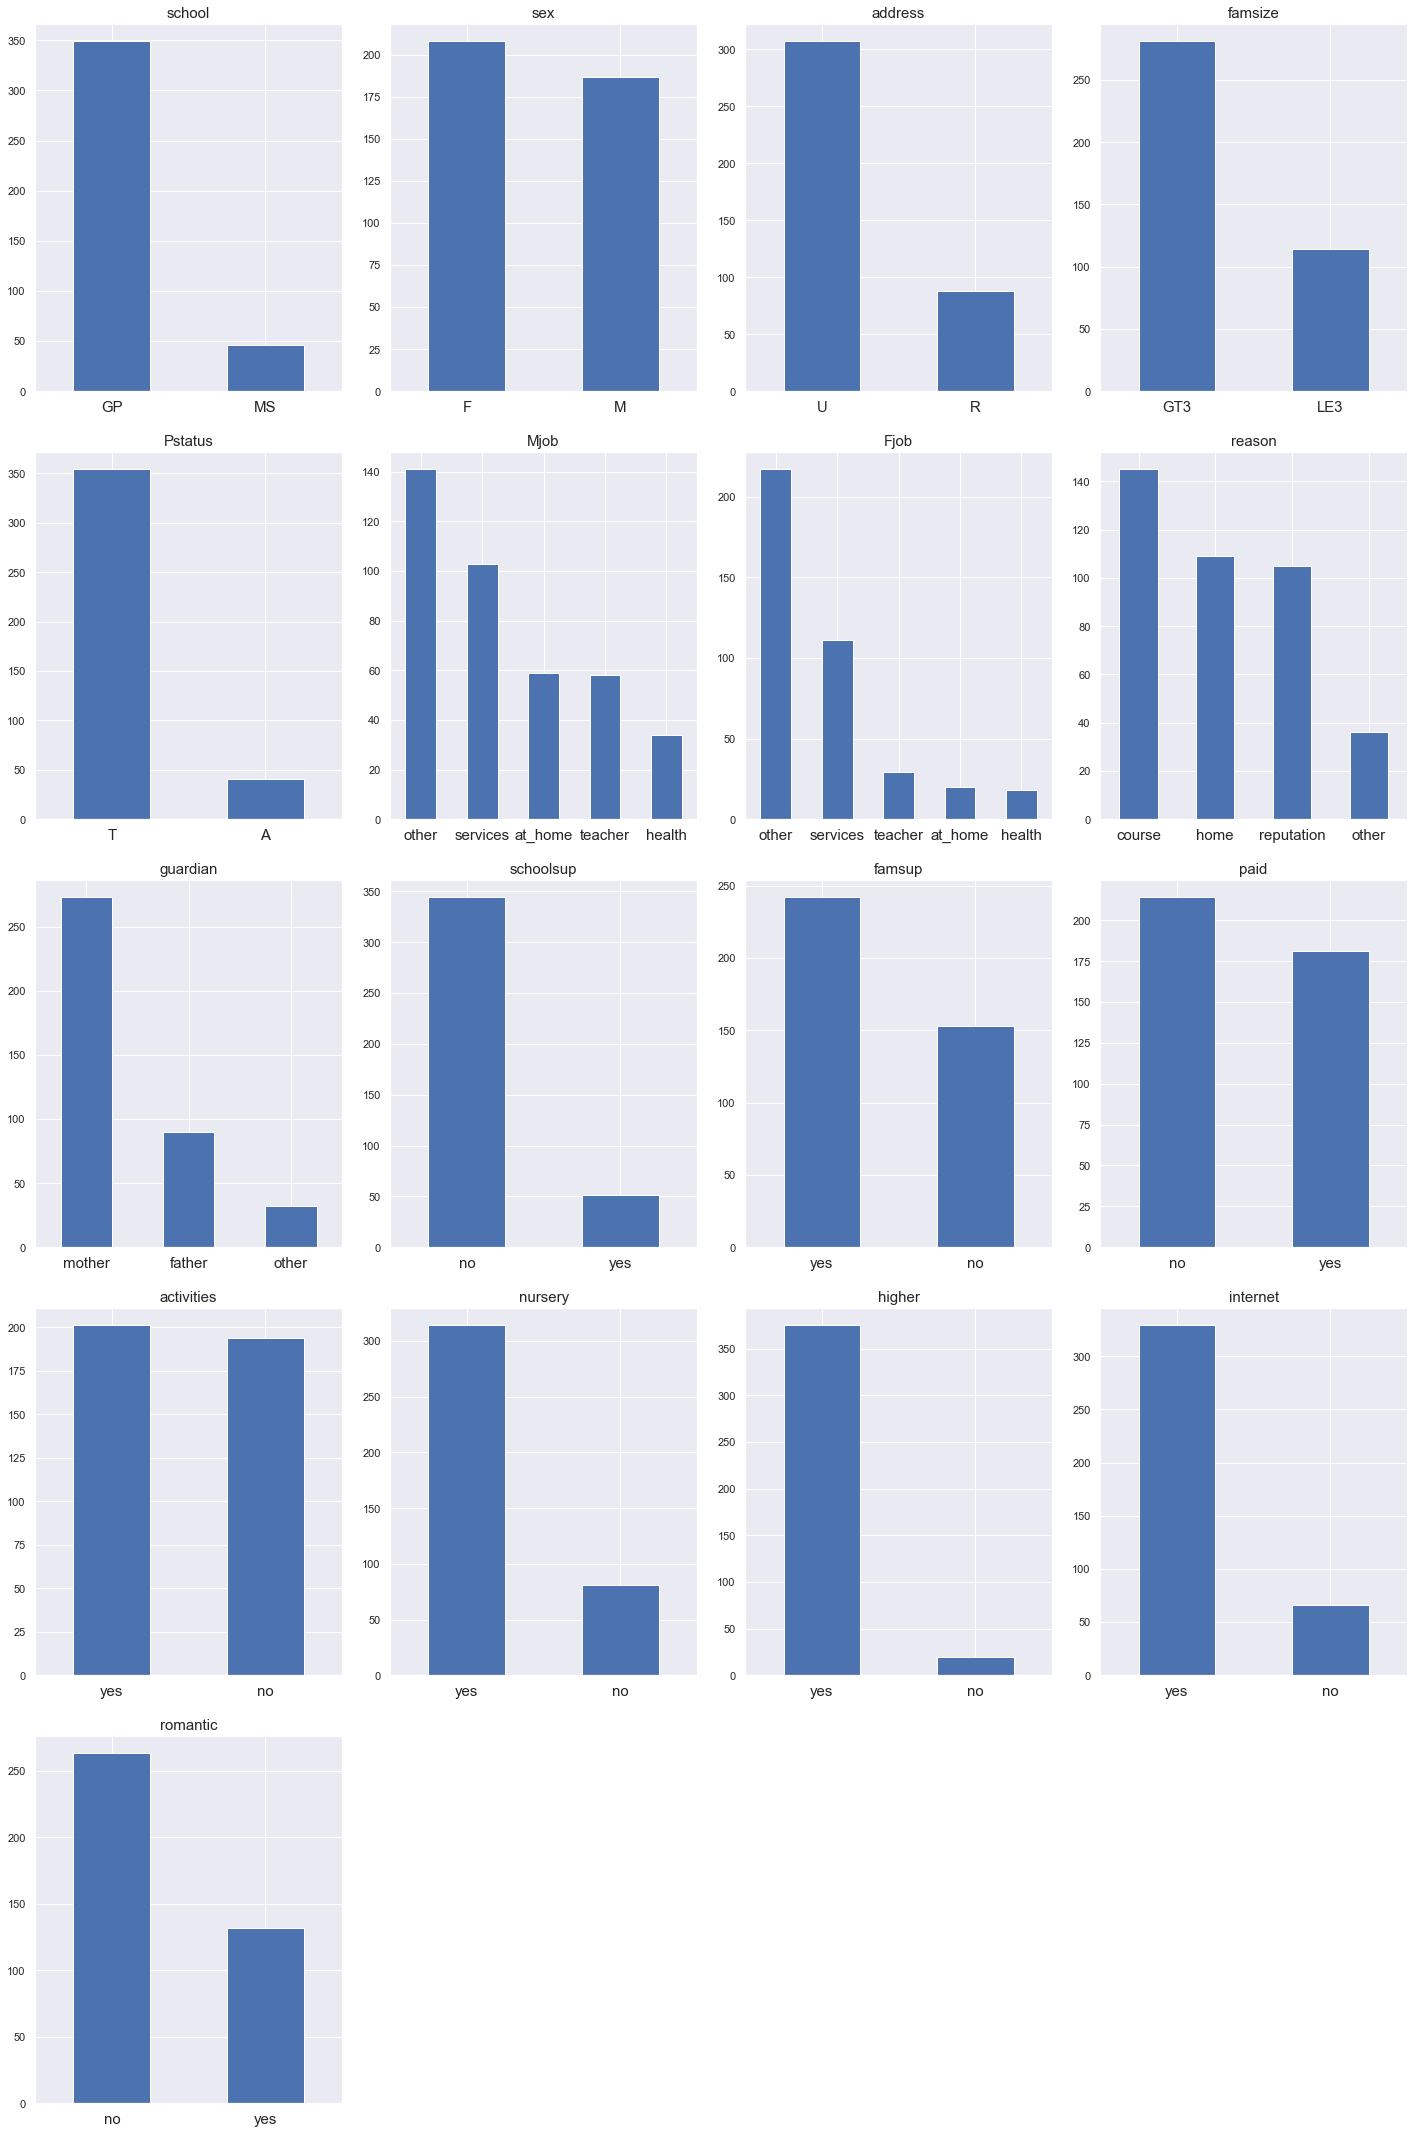

In [16]:
fig, axes = plt.subplots(5,4, figsize=(20,30))
count = 0
for i in range(5):
    for j in range(4):
        if(count< len(categorical_data)):
            data[categorical_data[count]].value_counts().plot.bar(ax=axes[i][j])
            axes[i][j].set_xticklabels(axes[i][j].get_xticklabels(), rotation=360, ha='center', fontsize=15)
            axes[i][j].set_title(categorical_data[count], fontsize =15)
        count = count+1
fig.delaxes(axes[4][1])
fig.delaxes(axes[4][2])
fig.delaxes(axes[4][3])
fig.tight_layout(pad=2.0)

## Trực quan cho dữ liệu Numerical

In [17]:
nume_df = data[numerical_data]
nume_df

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     18     4     4           2          2         0       4         3   
1     17     1     1           1          2         0       5         3   
2     15     1     1           1          2         3       4         3   
3     15     4     2           1          3         0       3         2   
4     16     3     3           1          2         0       4         3   
..   ...   ...   ...         ...        ...       ...     ...       ...   
390   20     2     2           1          2         2       5         5   
391   17     3     1           2          1         0       2         4   
392   21     1     1           1          1         3       5         5   
393   18     3     2           3          1         0       4         4   
394   19     1     1           1          1         0       3         2   

     goout  Dalc  Walc  health  absences  G1  G2  G3  number_day_alcohol  
0        4     1     1       3         6   5   6   6                   2  
1        3     1     1       3         4   5   5   6                   2  
2        2     2     3       3        10   7   8  10                   5  
3        2     1     1       5         2  15  14  15                   2  
4        2     1     2       5         4   6  10  10                   3  
..     ...   ...   ...     ...       ...  ..  ..  ..                 ...  
390      4     4     5       4        11   9   9   9                   9  
391      5     3     4       2         3  14  16  16                   7  
392      3     3     3       3         3  10   8   7                   6  
393      1     3     4       5         0  11  12  10                   7  
394      3     3     3       5         5   8   9   9                   6  

[395 rows x 17 columns]

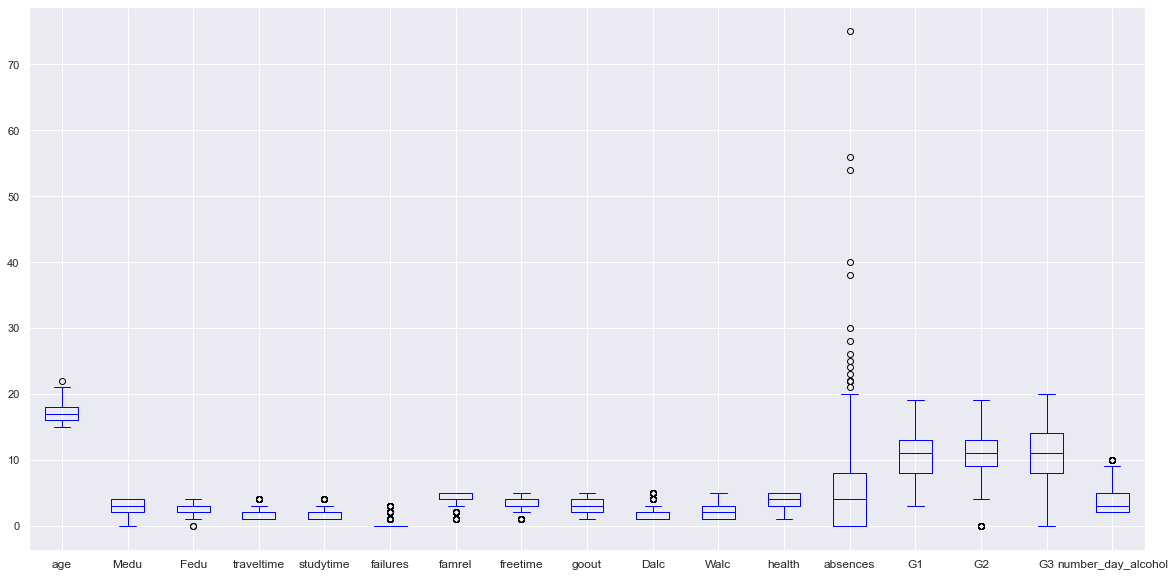

In [18]:
data.boxplot(figsize = (20,10), color="Blue")
plt.xticks(fontsize=12)
plt.show()

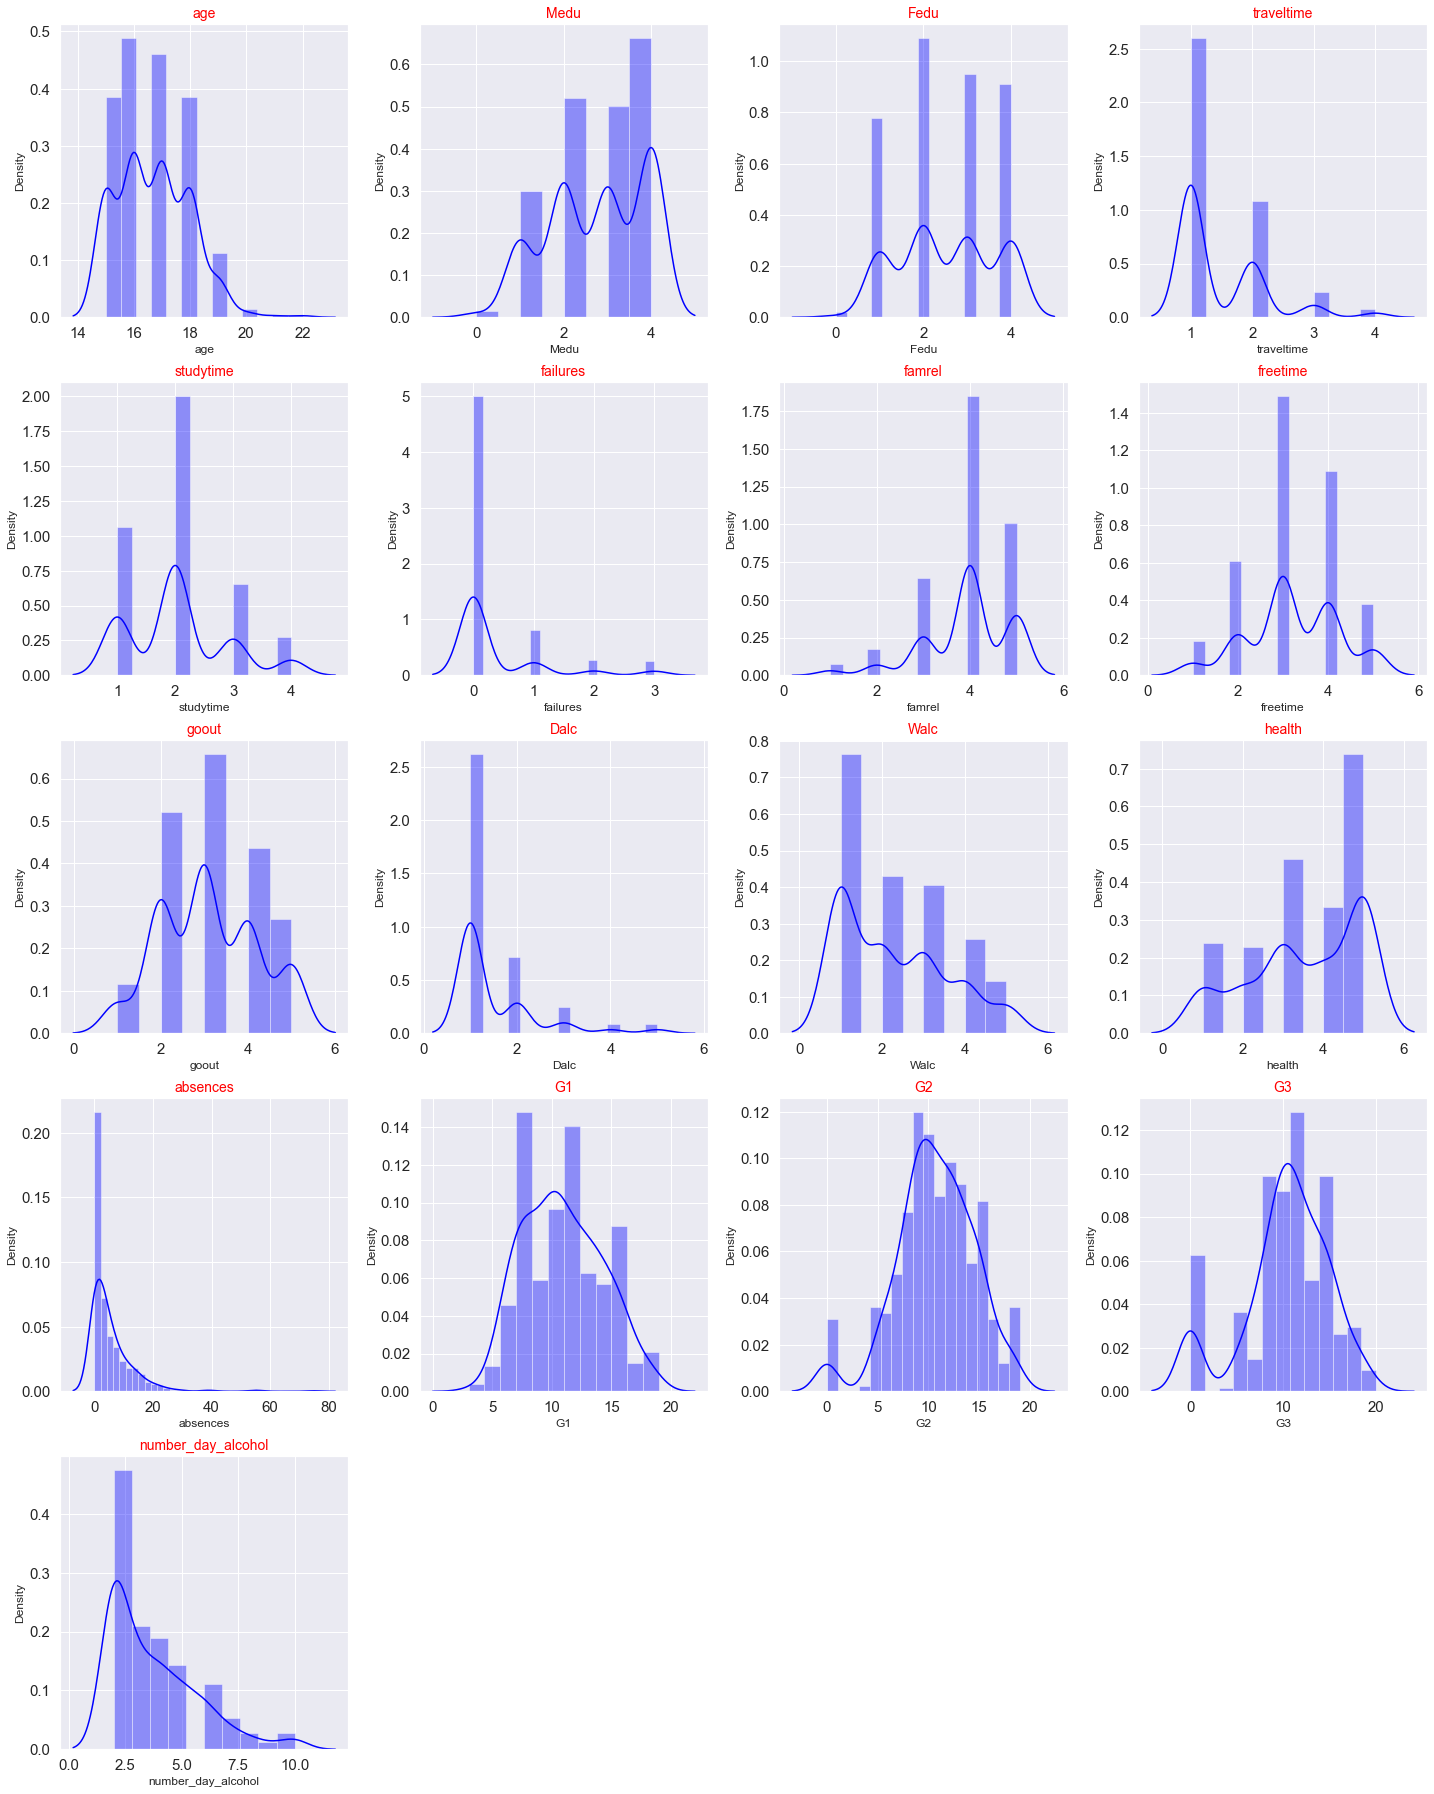

In [19]:
import warnings
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(ncols=4, nrows=5, figsize=(20,25))


for i, ax in zip(range(17), axes.flat):
    sns.distplot(data[numerical_data[i]], hist=True, ax=ax, color="Blue")
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_title(numerical_data[i], color="red", fontsize=14)
fig.delaxes(axes[4][1])
fig.delaxes(axes[4][2])
fig.delaxes(axes[4][3])
plt.tight_layout(pad=1)
plt.show()

## EDA

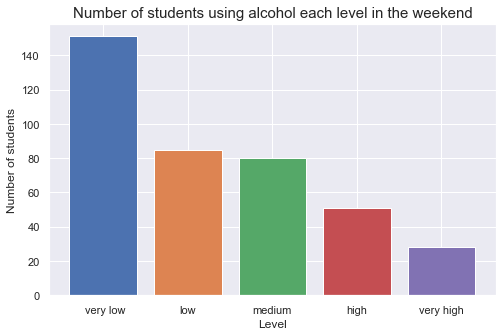

In [20]:
number_student_walc = data.groupby(["Walc"]).agg(['count'])['school'].reset_index()

plt.figure(figsize=(8,5))

plt.bar(number_student_walc["Walc"], number_student_walc['count'], color=sns.color_palette())

plt.xticks([1,2,3,4,5],[" very low", "low", "medium", "high", "very high"])

plt.xlabel("Level")

plt.ylabel("Number of students")

plt.title("Number of students using alcohol each level in the weekend", fontdict={'size':15})

plt.show()

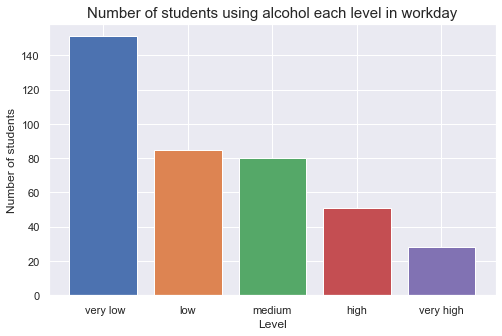

In [21]:
number_student_dalc = data.groupby(["Dalc"]).agg(['count'])['school'].reset_index()

plt.figure(figsize=(8,5))

plt.bar(number_student_dalc["Dalc"], number_student_walc['count'], color=sns.color_palette())

plt.xticks([1,2,3,4,5],[" very low", "low", "medium", "high", "very high"])

plt.xlabel("Level")

plt.ylabel("Number of students")

plt.title("Number of students using alcohol each level in workday", fontdict={'size':15})

plt.show()

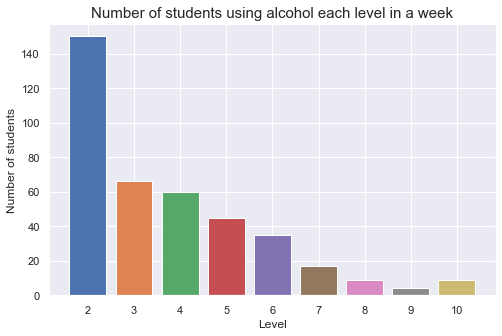

In [22]:
number_student_alcohol = data.groupby(["number_day_alcohol"]).agg(['count'])['school'].reset_index()

plt.figure(figsize=(8,5))

plt.bar(number_student_alcohol["number_day_alcohol"], number_student_alcohol['count'], color=sns.color_palette())

plt.xlabel("Level")

plt.xticks([2,3,4,5,6,7,8,9,10])

plt.ylabel("Number of students")

plt.title("Number of students using alcohol each level in a week", fontdict={'size':15})

plt.show()

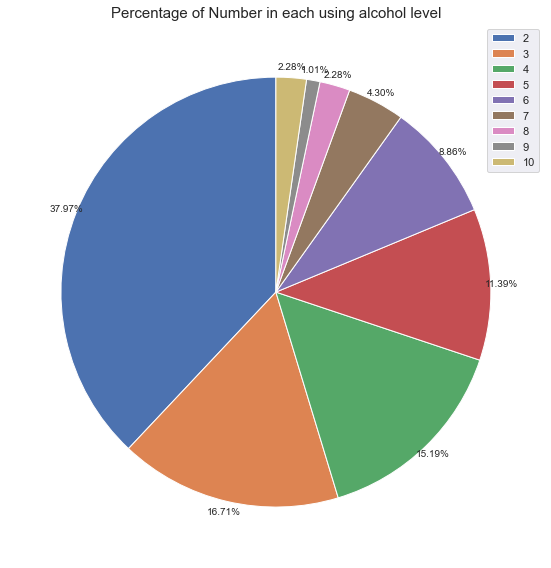

In [23]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%'.format(p=pct,v=val)
    return my_autopct

plt.figure(figsize=(8,8))

plt.pie(number_student_alcohol['count'], labels = None,labeldistance=None, autopct= make_autopct(number_student_walc['count']), startangle=90, pctdistance = 1.05)

plt.title("Percentage of Number in each using alcohol level", fontdict={'size':15})

plt.legend([2,3,4,5,6,7,8,9,10])

plt.tight_layout()

plt.show()

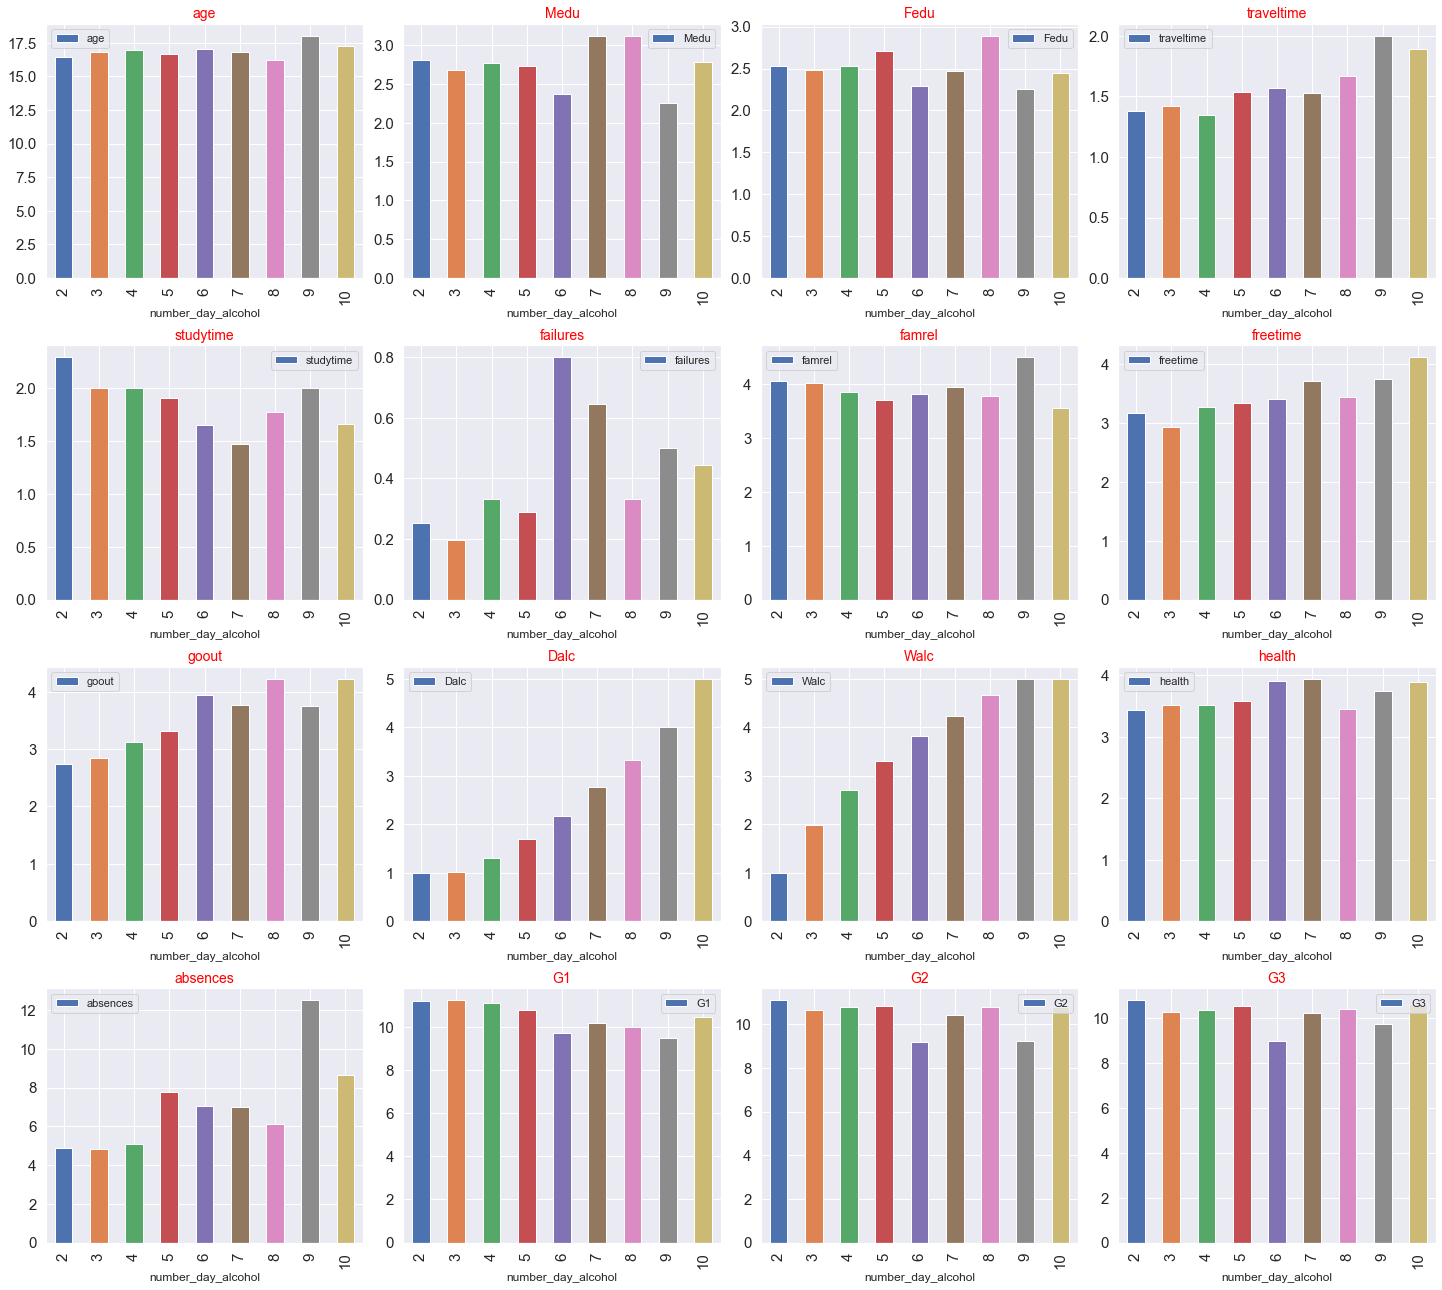

In [24]:
mean_each_group_alcohol = nume_df.groupby(["number_day_alcohol"]).mean().reset_index()

fig, axes = plt.subplots(4,4,figsize=(20,18))

for i, ax in zip(range(16), axes.flat):
    mean_each_group_alcohol.plot.bar(x="number_day_alcohol", y=numerical_data[i], ax=ax, color=sns.color_palette())
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_title(numerical_data[i], color="red", fontsize=14)
plt.tight_layout(pad=1)
plt.show()


**Nhận xét:**
- Phần lớn các học sinh dùng rượu có độ tuổi trung bình từ 16-17 tuổi
- Các sinh viên có mức độ dùng rượu cao (>=5) đều có thời gian di chuyển từ nhà đến trường lớn hơn 15p. Có thể thấy rằng các sinh viên có khoảng cách xa đến trường sẽ dùng nhiều rượu hơn
- Các sinh viên có mức độ dùng rượu cao (>=6) có thời gian đi cùng bạn bè (goout) ở mức cao (mức đô trên dưới 4)
- Những sinh viên dùng rượu đều có nhiều thời gian rảnh (mức độ trên dưới 4)
- Trình độ học vẫn của người bố có thể ảnh hưởng đến mức độ sử dụng rượu của sinh viên. Khi ta thấy các sinh viên có mức dùng rượu từ (8-10), có trình độ học vấn của bố ở mức thấp hơn hẳn so với các nhóm khác


### Giới tính và mức độ sử dụng rượu bia

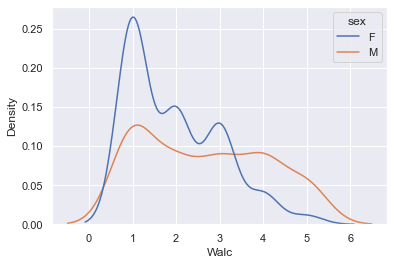

In [25]:
sns.kdeplot(x=data["Walc"], hue=data["sex"])
plt.show()

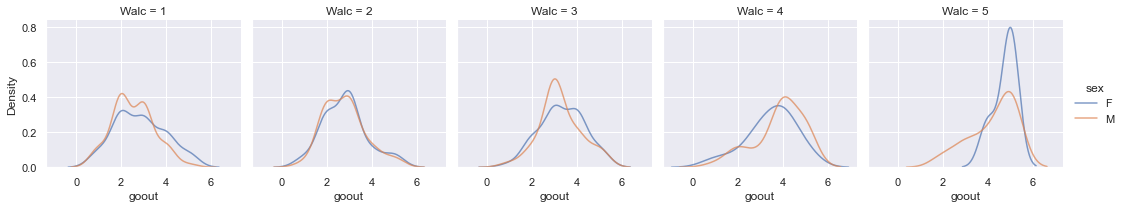

<Figure size 1080x504 with 0 Axes>

In [26]:
g = sns.FacetGrid(data, col='Walc', hue="sex")
g.map(sns.kdeplot, "goout",alpha=.7)
plt.figure(figsize=(15,7))
g.add_legend()
plt.show()

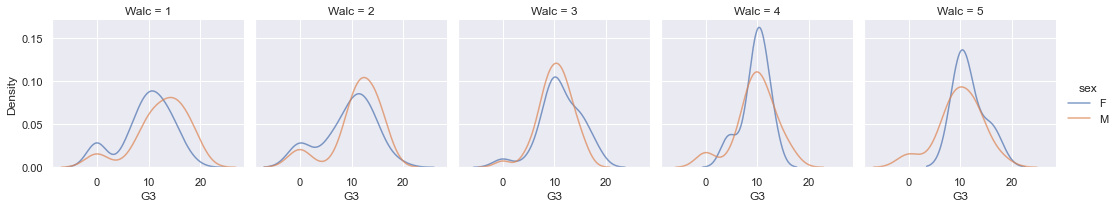

<Figure size 1080x504 with 0 Axes>

In [27]:
g = sns.FacetGrid(data, col='Walc', hue="sex")
g.map(sns.kdeplot, "G3",alpha=.7)
plt.figure(figsize=(15,7))
g.add_legend()
plt.show()

**Nhận xét:**
- Sinh viên nữ có tỉ lệ sử dụng rượu, bia cao hơn các sinh viên nam. Nhưng ở nhóm sử dụng mức độ cao (4-5), các tỉ lệ các sinh viên nam cao hơn
- Trong nhóm Walc=5, các sinh viên nữ có thời gian bên ngoài cao hơn hẳn các nhóm còn lại và cao hơn các sinh viên nam. Có thể thấy rằng, việc có nhiều thời gian bên ngoài có thể làm gia tăng việc sử dụng rượu, bia ở các sinh viên nữ
- Điểm số của cả nhóm sinh viên nam và nữ, càng gần phân phối chuẩn với trung bình bằng 10 khi mà việc sử dụng rượu, bia càng thường xuyên

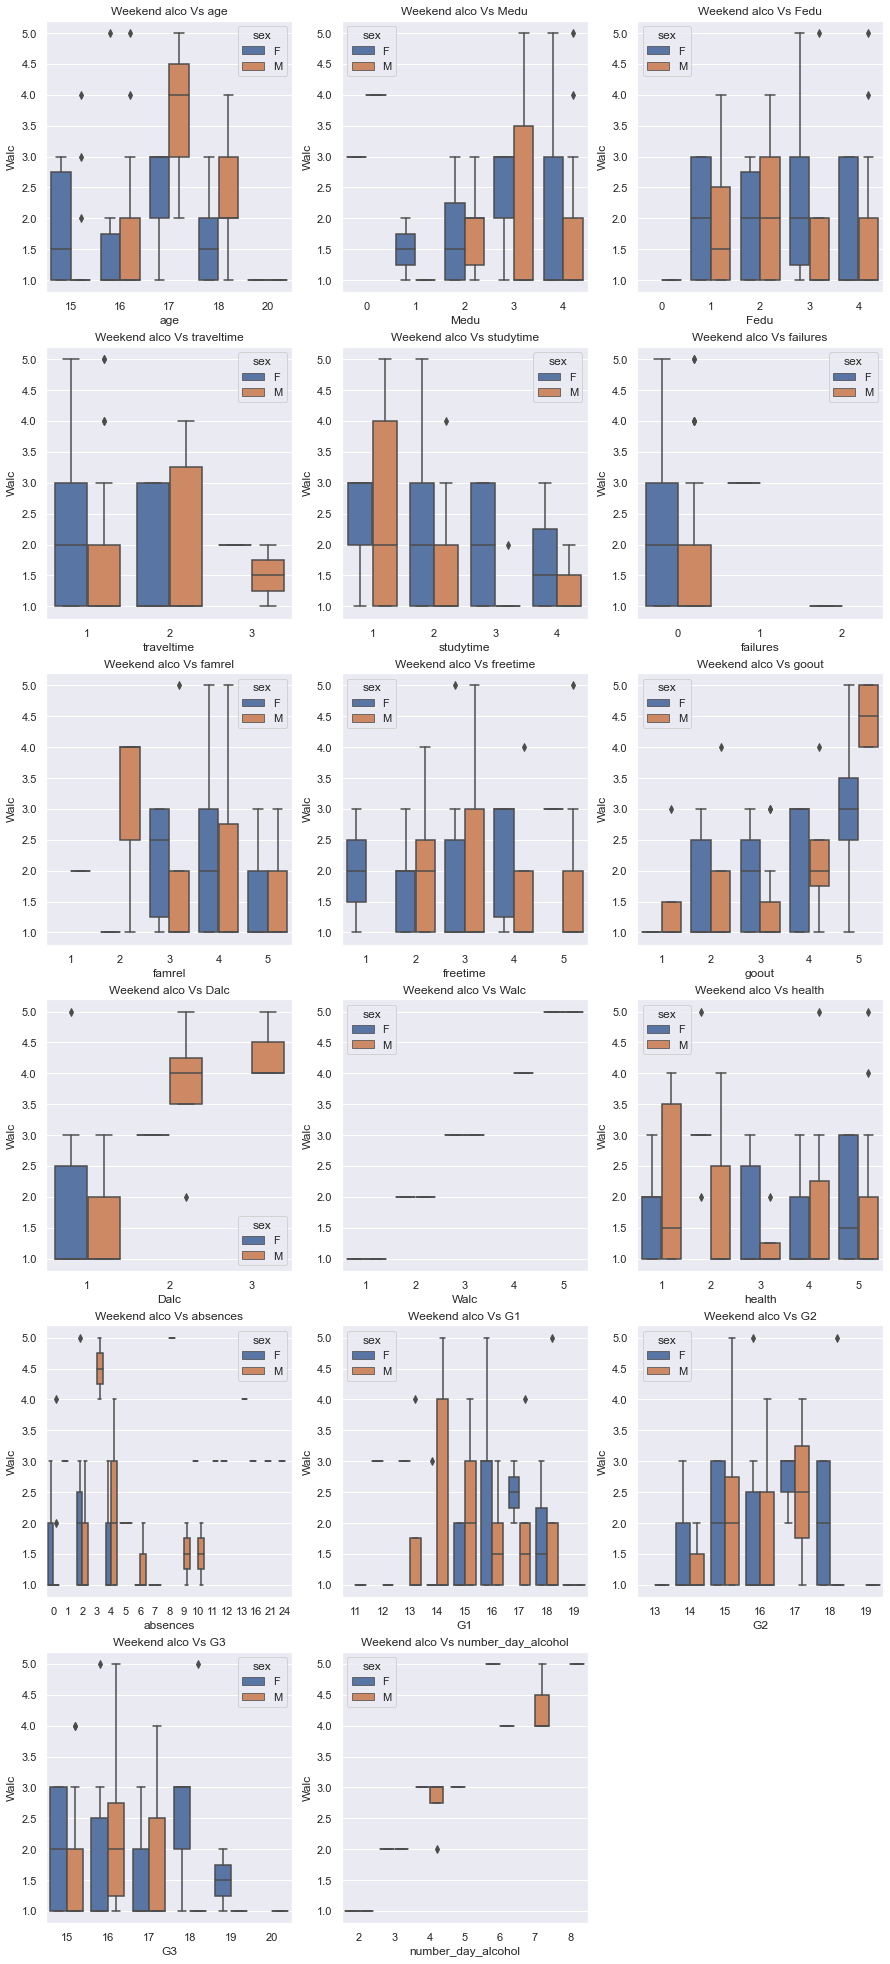

In [28]:
math_g3 = data[data["G3"]>=15]
i=1
plt.figure(figsize =(15,35))
for col in numerical_data:
    plt.subplot(6,3,i)
    sns.boxplot(x =col, y = 'Walc', hue = 'sex', data = math_g3)
    plt.title('Weekend alco Vs '+ col)
    i = 1+i

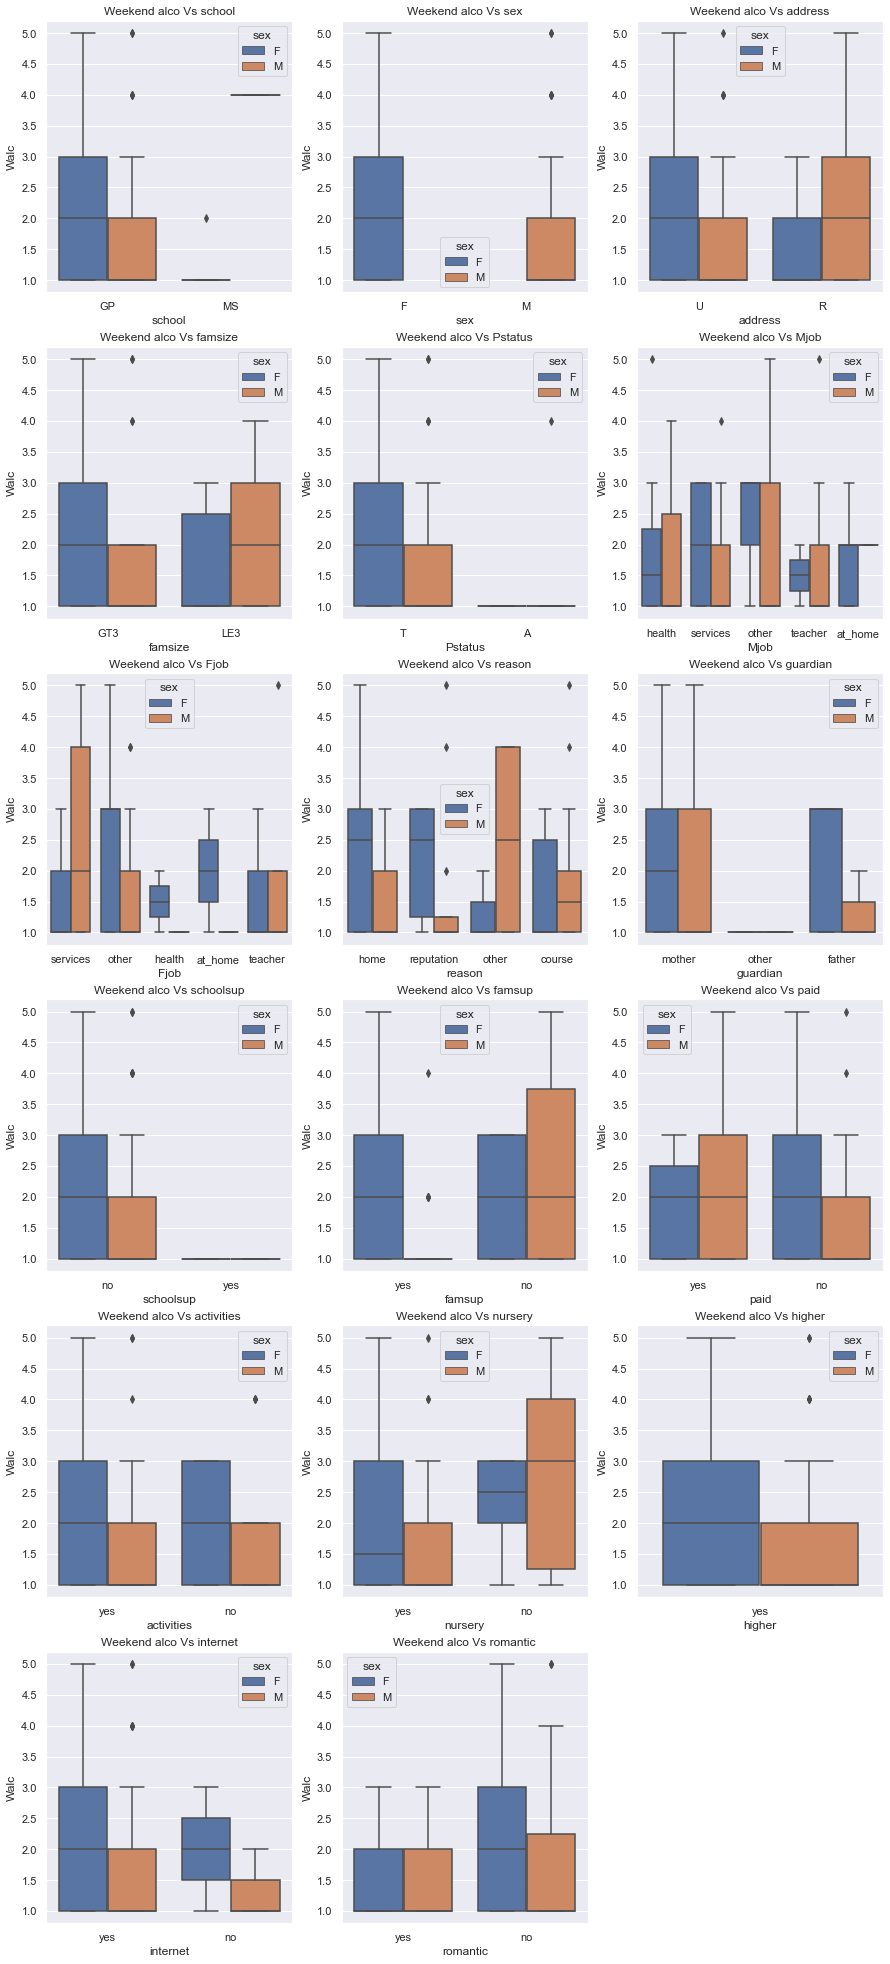

In [29]:
math_g3 = data[data["G3"]>=15]
i=1
plt.figure(figsize =(15,35))
for col in categorical_data:
    plt.subplot(6,3,i)
    sns.boxplot(x =col, y = 'Walc', hue = 'sex', data = math_g3)
    plt.title('Weekend alco Vs '+ col)
    i = 1+i

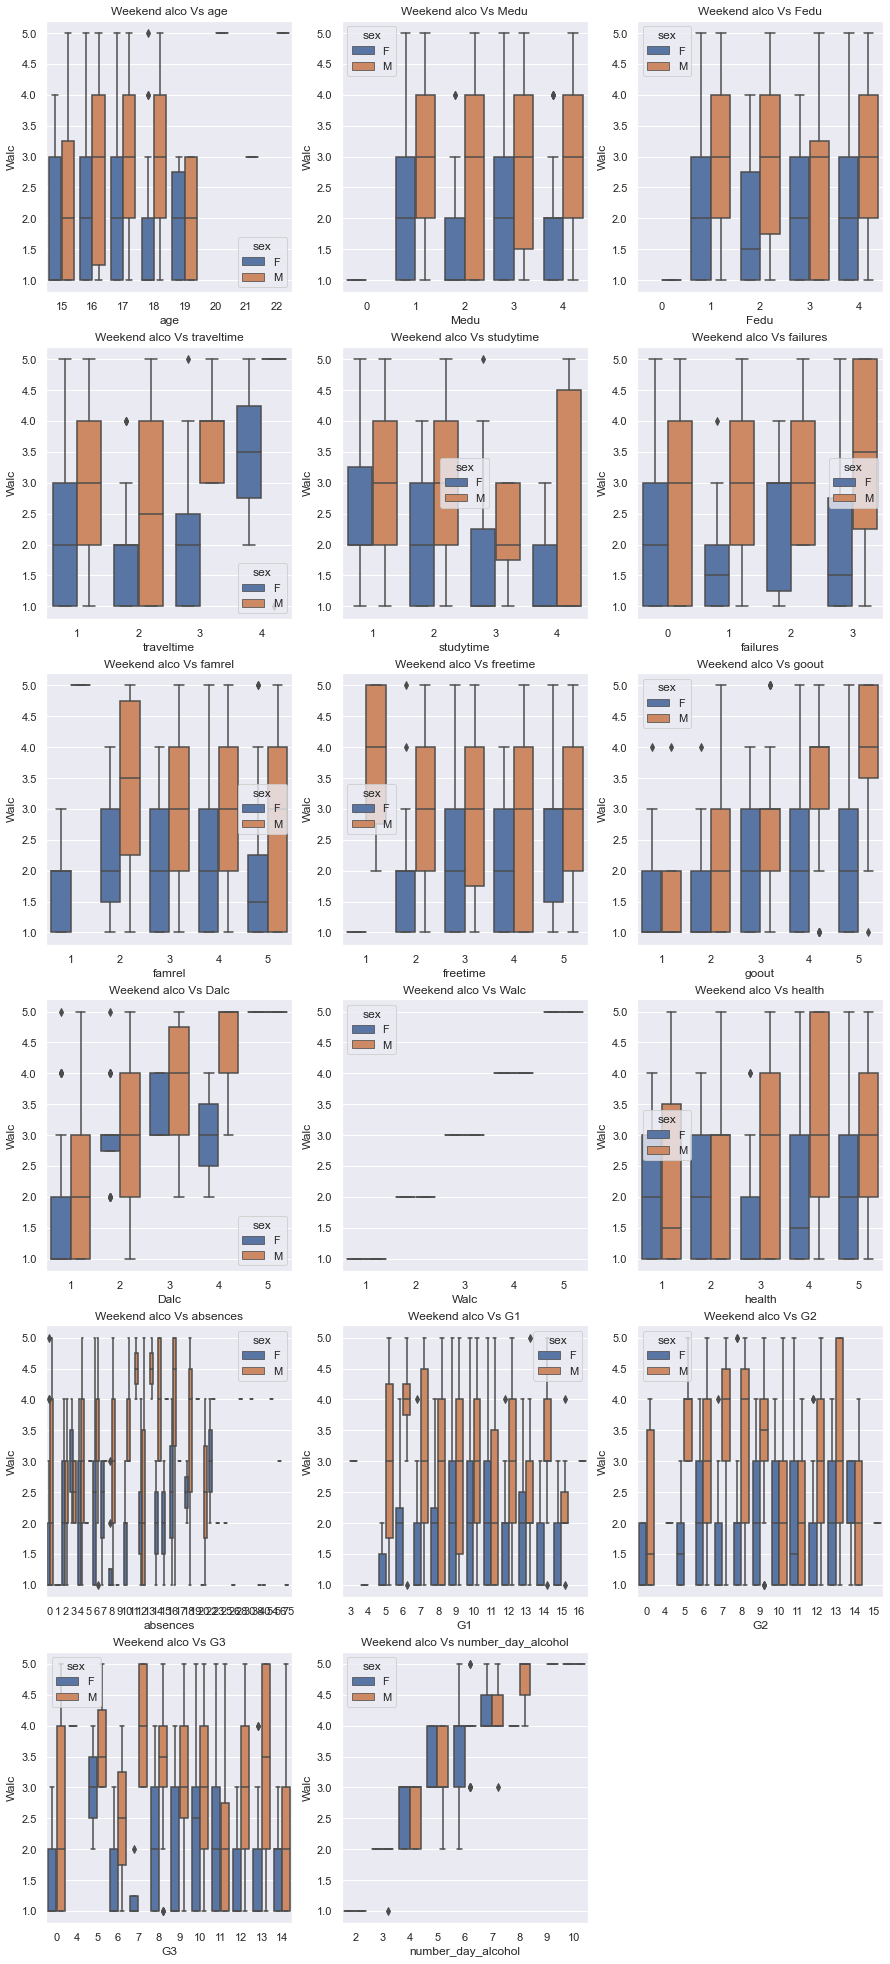

In [30]:
#Truc quan nhom diem nho hon 15 voi du lieu numerical
math_g3 = data[data["G3"]<15]
i=1
plt.figure(figsize =(15,35))
for col in numerical_data:
    plt.subplot(6,3,i)
    sns.boxplot(x =col, y = 'Walc', hue = 'sex', data = math_g3)
    plt.title('Weekend alco Vs '+ col)
    i = 1+i

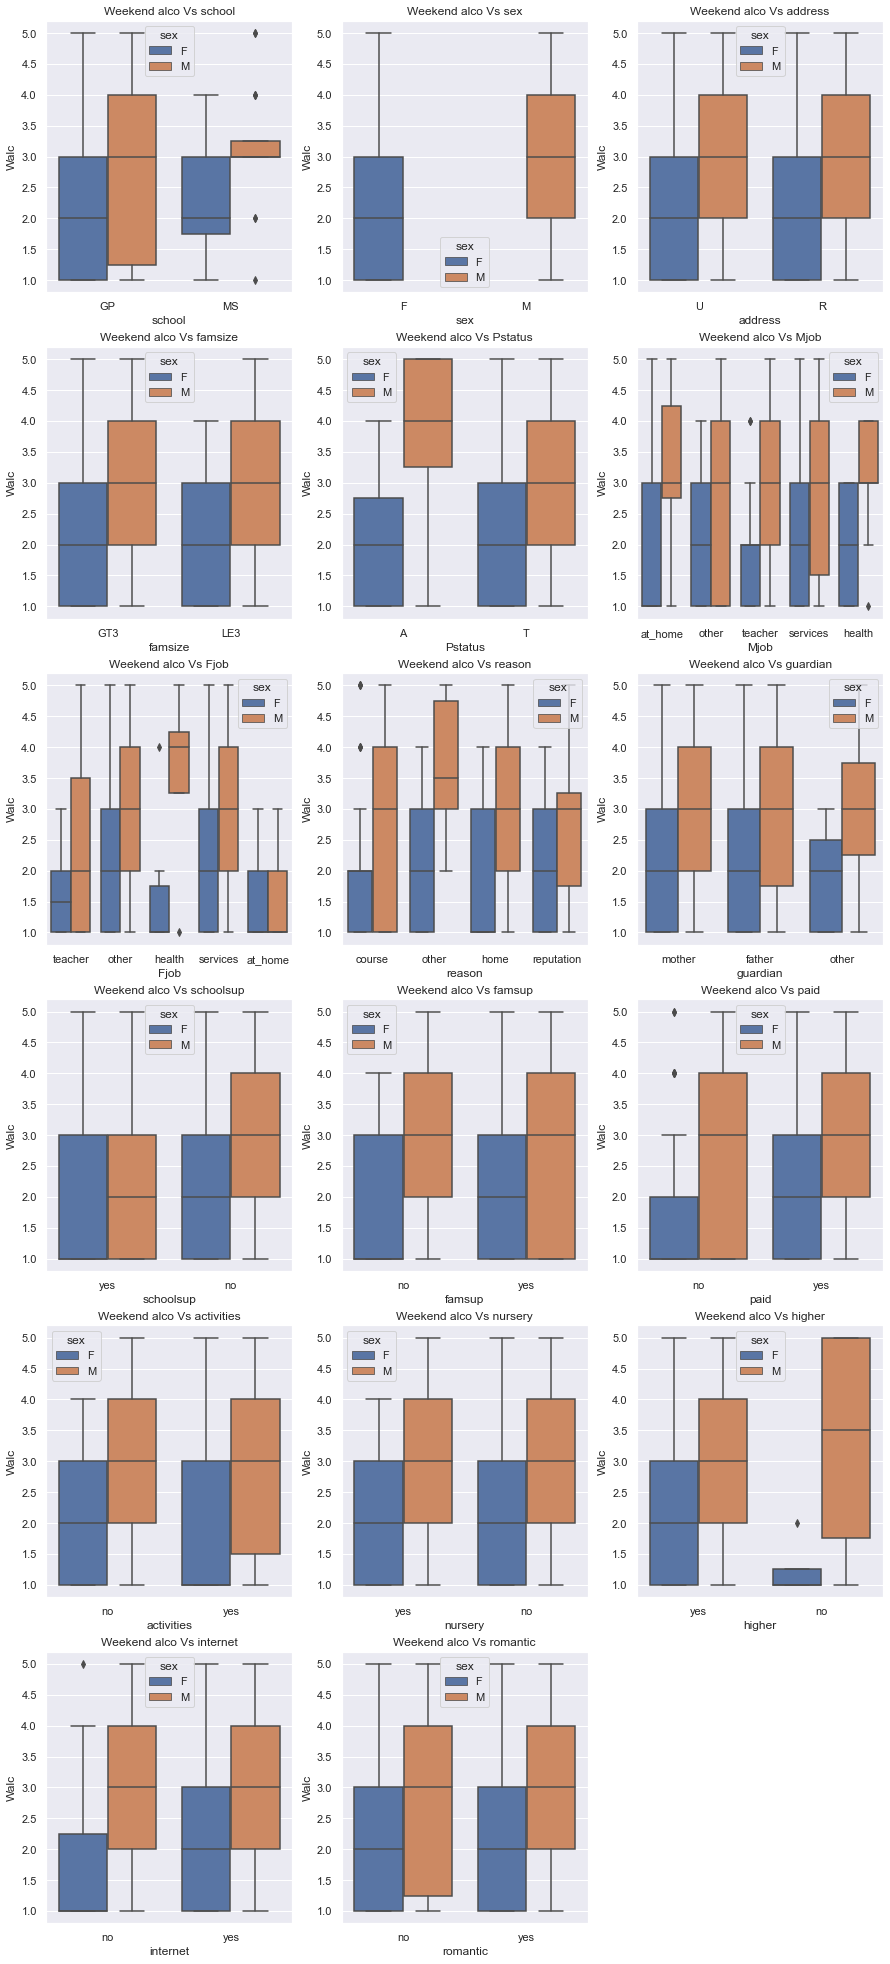

In [31]:
#Truc quan nhom diem nho hon 15 voi du lieu category
math_g3 = data[data["G3"]<15]
i=1
plt.figure(figsize =(15,35))
for col in categorical_data:
    plt.subplot(6,3,i)
    sns.boxplot(x =col, y = 'Walc', hue = 'sex', data = math_g3)
    plt.title('Weekend alco Vs '+ col)
    i = 1+i

**Nhận xét:**
- Ở nhóm các sinh viên nam có điểm dưới 15, khi số mức độ goout cao thì các sinh viên có xu hướng dùng rượu nhiều hơn (giá trị trung bình, và phân vị đều tăng). Ngược lại ở nhóm sinh viên nữ, giá trị trung bình và phân vị không chênh lệch nhiều, cho thấy mức độ goout không ảnh hưởng nhiều lên nhóm sinh viên nữ
- Các sinh viên có điểm thấp thường mắc nhiều lỗi hơn các sinh viên có điểm cao, và tỉ lệ này gia tăng khi mức độ dùng cồn tăng. Điều này cho thấy dùng rượu ảnh hưởng xấu đến cuộc sống của các sinh viên
- Các sinh viên mong muốn học tiếp ở bậc giáo dục, đều có mức độ sử dụng rượu thấp. Các sinh viên không có nguyện vọng học tiếp lên cao, có xu hướng sử dụng rượu bia nhiều đặc biệt ở nam giới
- Nhìn chung, các sinh viên nữ có mức sử dụng rượu bia thấp (phần lớn 1-3), các sinh viên nam có mức dao động cao hơn
